In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

data = pd.read_csv("E:/SEMESTER 7/PD/PROYEK/myntra-mens-product-dataset/men-products.csv", delimiter=',', index_col=0)
data.shape

(61456, 10)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61456 entries, 1 to 61503
Data columns (total 10 columns):
NAME                   61455 non-null object
CATEGORY               61456 non-null object
DESCRIPTION & COLOR    61456 non-null object
FABRIC                 56623 non-null object
IMAGE                  61456 non-null object
SIZE                   57618 non-null object
PRICE                  61456 non-null object
PRODUCT ID             61456 non-null int64
WEBSITE                61456 non-null object
PRODUCT URL            61456 non-null object
dtypes: int64(1), object(9)
memory usage: 5.2+ MB


## Data Preprocessing

### 1. Handling Missing Values

In [3]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'percent_missing': (data.isnull().sum()/20000)*100})
missing_data

,total_missing,percent_missing
NAME,1,0.005
CATEGORY,0,0.000
DESCRIPTION & COLOR,0,0.000
FABRIC,4833,24.165
IMAGE,0,0.000
SIZE,3838,19.190
PRICE,0,0.000
PRODUCT ID,0,0.000
WEBSITE,0,0.000
PRODUCT URL,0,0.000


In [4]:
# Isi data Na dengan nilai Null
data.fillna("Null", inplace = True) 
data.isnull().sum()

NAME                   0
CATEGORY               0
DESCRIPTION & COLOR    0
FABRIC                 0
IMAGE                  0
SIZE                   0
PRICE                  0
PRODUCT ID             0
WEBSITE                0
PRODUCT URL            0
dtype: int64

### 2. Data Duplication

In [5]:
data.duplicated().sum()

0

## Exploratory Data Analysis

In [6]:
data.rename(columns = {'DESCRIPTION & COLOR':'DESCRIPTION'}, inplace = True) 

In [7]:
data.columns

Index(['NAME', 'CATEGORY', 'DESCRIPTION', 'FABRIC', 'IMAGE', 'SIZE', 'PRICE',
       'PRODUCT ID', 'WEBSITE', 'PRODUCT URL'],
      dtype='object')

In [8]:
data1 = data.sample(10000, random_state=1).copy()

In [9]:
pd.DataFrame(data1.CATEGORY.unique()).values

array([['men-jackets-coats'],
       ['Men-Formal-Trousers'],
       ['Innerwear & Sleapwear'],
       ['formal-shirts'],
       ['T-Shirts'],
       ['Jeans'],
       ['casual-shirts'],
       ['Men-Casual-Trousers'],
       ['accessories'],
       ['men-suits'],
       ['men-swimwear']], dtype=object)

In [10]:
# Rename kategori produk
data1.replace({'CATEGORY': 
             {'accessories': 'Accesories', 
              'casual-shirts': 'Casual Shirts',
              'Men-Casual-Trousers': 'Men Casual Trousers',
              'formal-shirts': 'Formal Shirts',
              'Men-Formal-Trousers': 'Men Formal Trousers',
              'men-jackets-coats': 'Men Jackets Coats',
              'men-swimwear': 'Men Swimwear',
              'men-suits': 'Men Suits'}}, 
              inplace= True)

In [11]:
pd.DataFrame(data1.CATEGORY.unique()).values

array([['Men Jackets Coats'],
       ['Men Formal Trousers'],
       ['Innerwear & Sleapwear'],
       ['Formal Shirts'],
       ['T-Shirts'],
       ['Jeans'],
       ['Casual Shirts'],
       ['Men Casual Trousers'],
       ['Accesories'],
       ['Men Suits'],
       ['Men Swimwear']], dtype=object)

In [12]:
# Create a new column 'category_id' with encoded categories 
data1['CATEGORY_ID'] = data1['CATEGORY'].factorize()[0]
CATEGORY_ID_DF = data1[['CATEGORY', 'CATEGORY_ID']].drop_duplicates()


# Dictionaries for future use
CATEGORY_TO_ID = dict(CATEGORY_ID_DF.values)
ID_TO_CATEGORY = dict(CATEGORY_ID_DF[['CATEGORY_ID', 'CATEGORY']].values)

# New dataframe
data1.head()

,NAME,CATEGORY,DESCRIPTION,FABRIC,IMAGE,SIZE,PRICE,PRODUCT ID,WEBSITE,PRODUCT URL,CATEGORY_ID
SERIAL NO,,,,,,,,,,,
25553,Fort Collins Men Red Solid Padded Jacket,Men Jackets Coats,"Fort Collins Men Red Solid Padded Jacket, For...",Nylon,"https://assets.myntassets.com/h_1440,q_100,w_1...",The model (height 6') is wearing a size M,1799,7695293,Myntra,https://www.myntra.com/jackets/fort-collins/fo...,0
18640,MANGO MAN Men Navy Blue Tailored Slim Fit Soli...,Men Formal Trousers,MANGO MAN Men Navy Blue Tailored Slim Fit Soli...,"69% polyester, 29% viscose, 2% elastane","https://assets.myntassets.com/h_1440,q_100,w_1...",Tailored slim fit,3493,5567522,Myntra,https://www.myntra.com/trousers/mango-man/mang...,1
18543,Arrow Men Navy Blue Tapered Fit Checked Formal...,Men Formal Trousers,Arrow Men Navy Blue Tapered Fit Checked Formal...,Polyester and viscose rayon,"https://assets.myntassets.com/h_1440,q_100,w_1...",Tapered Fit,999,7248825,Myntra,https://www.myntra.com/trousers/arrow/arrow-me...,1
21475,Hanes Charcoal Grey Thermal T-Shirt,Innerwear & Sleapwear,"Hanes Charcoal Grey Thermal T Shirt, Hanes, T...","60% polyester, 40% cotton","https://assets.myntassets.com/h_1440,q_100,w_1...",The model (height 6') is wearing a size M,424,2159310,Myntra,https://www.myntra.com/thermal-tops/hanes/hane...,2
14859,Hancock Men Blue Regular Fit Striped Formal Shirt,Formal Shirts,Hancock Men Blue Regular Fit Striped Formal Sh...,Cotton,"https://assets.myntassets.com/h_1440,q_100,w_1...",Regular fit,759,7480995,Myntra,https://www.myntra.com/shirts/hancock/hancock-...,3


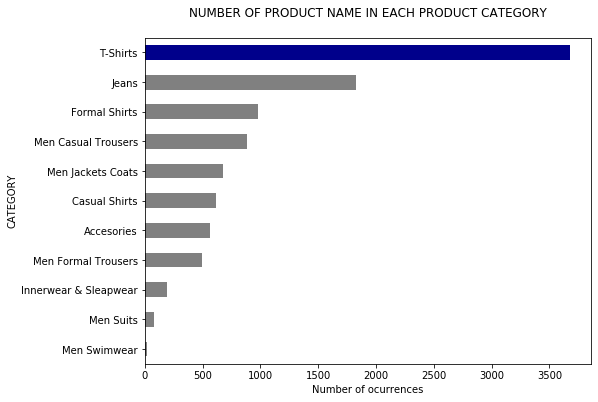

In [13]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
data1.groupby('CATEGORY').NAME.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF PRODUCT NAME IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [14]:
data1.CATEGORY.unique()

array(['Men Jackets Coats', 'Men Formal Trousers',
       'Innerwear & Sleapwear', 'Formal Shirts', 'T-Shirts', 'Jeans',
       'Casual Shirts', 'Men Casual Trousers', 'Accesories', 'Men Suits',
       'Men Swimwear'], dtype=object)

## Text Preprocessing

In [15]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import ngrams

### 1. Punctuation Removal

In [16]:
# Punctuation Removal
data1['NAME'] = data1['NAME'].str.replace('[^\w\s]','')
# Hasil Punctuation Removal
print(data1["NAME"].head(50))

SERIAL NO
25553             Fort Collins Men Red Solid Padded Jacket
18640    MANGO MAN Men Navy Blue Tailored Slim Fit Soli...
18543    Arrow Men Navy Blue Tapered Fit Checked Formal...
21475                   Hanes Charcoal Grey Thermal TShirt
14859    Hancock Men Blue Regular Fit Striped Formal Shirt
59190           Tantra Men Black Printed Round Neck Tshirt
35662    Aeropostale Men Blue Regular Fit MidRise Mildl...
3632     ether Men Navy Blue Slim Fit Anti Microbial Co...
26606    Roadster Men White Regular Fit MidRise Clean L...
21323           Dollar Bigboss Pack of 3 Trunks MDTR03PO34
45072     Moda Rapido Men Black Printed Polo Collar Tshirt
15013    Louis Philippe Men Grey Regular Fit Self Desig...
27049                 Light Blue Mid Rise Skinny Fit Jeans
4661     HIGHLANDER Men Olive Green Slim Fit Camouflage...
6207     US Polo Assn Denim Co Men White  Blue Slim Fit...
5286       Levis Men Navy Blue Slim Fit Solid Casual Shirt
23572    Louis Philippe Sport Men Charcoal Gre

### 2. Convert String to Lower

In [17]:
# mengubah ke huruf kecil
data1['NAME'] = data1['NAME'].str.lower()
print(data1['NAME'].head(5))

SERIAL NO
25553             fort collins men red solid padded jacket
18640    mango man men navy blue tailored slim fit soli...
18543    arrow men navy blue tapered fit checked formal...
21475                   hanes charcoal grey thermal tshirt
14859    hancock men blue regular fit striped formal shirt
Name: NAME, dtype: object


### 3. Remove Stop Words & Stemming

In [18]:
import re
from nltk.corpus import stopwords
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    meaningful_words = [w for w in words if w not in stopword_set]
    
    #stemmed words
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in meaningful_words]
    
    #join the cleaned words in a list
    cleaned_word_list = " ".join(stemmed_words)
    
    return cleaned_word_list

In [19]:
data1['NAME'] = data1['NAME'].apply(lambda line : preprocess(line))

In [20]:
data1.head()

,NAME,CATEGORY,DESCRIPTION,FABRIC,IMAGE,SIZE,PRICE,PRODUCT ID,WEBSITE,PRODUCT URL,CATEGORY_ID
SERIAL NO,,,,,,,,,,,
25553,fort collin men red solid pad jacket,Men Jackets Coats,"Fort Collins Men Red Solid Padded Jacket, For...",Nylon,"https://assets.myntassets.com/h_1440,q_100,w_1...",The model (height 6') is wearing a size M,1799,7695293,Myntra,https://www.myntra.com/jackets/fort-collins/fo...,0
18640,mango man men navi blue tailor slim fit solid ...,Men Formal Trousers,MANGO MAN Men Navy Blue Tailored Slim Fit Soli...,"69% polyester, 29% viscose, 2% elastane","https://assets.myntassets.com/h_1440,q_100,w_1...",Tailored slim fit,3493,5567522,Myntra,https://www.myntra.com/trousers/mango-man/mang...,1
18543,arrow men navi blue taper fit check formal tro...,Men Formal Trousers,Arrow Men Navy Blue Tapered Fit Checked Formal...,Polyester and viscose rayon,"https://assets.myntassets.com/h_1440,q_100,w_1...",Tapered Fit,999,7248825,Myntra,https://www.myntra.com/trousers/arrow/arrow-me...,1
21475,hane charcoal grey thermal tshirt,Innerwear & Sleapwear,"Hanes Charcoal Grey Thermal T Shirt, Hanes, T...","60% polyester, 40% cotton","https://assets.myntassets.com/h_1440,q_100,w_1...",The model (height 6') is wearing a size M,424,2159310,Myntra,https://www.myntra.com/thermal-tops/hanes/hane...,2
14859,hancock men blue regular fit stripe formal shirt,Formal Shirts,Hancock Men Blue Regular Fit Striped Formal Sh...,Cotton,"https://assets.myntassets.com/h_1440,q_100,w_1...",Regular fit,759,7480995,Myntra,https://www.myntra.com/shirts/hancock/hancock-...,3


### Count Vectors 

In [21]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(data1.NAME).toarray()

labels = data1.CATEGORY

print("Each of the %d product name is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 10000 product name is represented by 1664 features (TF-IDF score of unigrams and bigrams)


In [22]:
# Finding the three most correlated terms with each of the product categories
N = 3
for CATEGORY, CATEGORY_ID in sorted(CATEGORY_TO_ID.items()):
    features_chi2 = chi2(features, labels == CATEGORY_ID)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n==> %s:" %(CATEGORY))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Accesories:
  * Most Correlated Unigrams are: freelift, free, zaveri
  * Most Correlated Bigrams are: french connect, free author, zaveri pearl

==> Casual Shirts:
  * Most Correlated Unigrams are: freelift, free, zaveri
  * Most Correlated Bigrams are: french connect, free author, zaveri pearl

==> Formal Shirts:
  * Most Correlated Unigrams are: freelift, free, zaveri
  * Most Correlated Bigrams are: french connect, free author, zaveri pearl

==> Innerwear & Sleapwear:
  * Most Correlated Unigrams are: freelift, free, zaveri
  * Most Correlated Bigrams are: french connect, free author, zaveri pearl

==> Jeans:
  * Most Correlated Unigrams are: freelift, free, zaveri
  * Most Correlated Bigrams are: french connect, free author, zaveri pearl

==> Men Casual Trousers:
  * Most Correlated Unigrams are: freelift, free, zaveri
  * Most Correlated Bigrams are: french connect, free author, zaveri pearl

==> Men Formal Trousers:
  * Most Correlated Unigrams are: freelift, free, zaveri
  

## Modeling

In [23]:
X = data1['NAME'] # Collection of documents
y = data1['CATEGORY'] # Target or the labels we want to predict 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [24]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\ITD_Stu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ITD_Stu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ITD_Stu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ITD_Stu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ITD_Stu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: 

In [25]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.990601,0.002377
LogisticRegression,0.986601,0.001837
MultinomialNB,0.970701,0.002693
RandomForestClassifier,0.799802,0.004147


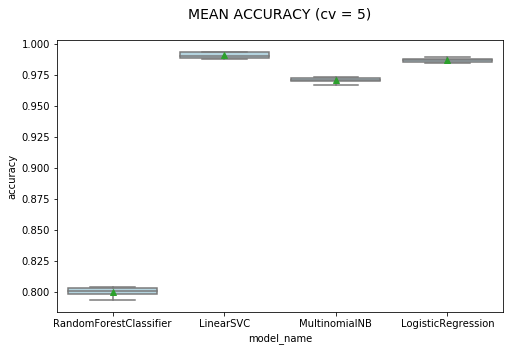

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

## Model Evaluation

In [27]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               data1.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, target_names = data1['CATEGORY'].unique()))

				CLASSIFICATIION METRICS

                       precision    recall  f1-score   support

    Men Jackets Coats       1.00      0.99      1.00       153
  Men Formal Trousers       0.93      0.97      0.95       157
Innerwear & Sleapwear       0.97      0.95      0.96       242
        Formal Shirts       1.00      1.00      1.00        44
             T-Shirts       1.00      1.00      1.00       469
                Jeans       1.00      0.99      0.99       214
        Casual Shirts       0.99      0.99      0.99       124
  Men Casual Trousers       1.00      1.00      1.00       163
           Accesories       1.00      1.00      1.00        22
            Men Suits       1.00      1.00      1.00         4
         Men Swimwear       1.00      1.00      1.00       908

             accuracy                           0.99      2500
            macro avg       0.99      0.99      0.99      2500
         weighted avg       0.99      0.99      0.99      2500



## Confusion Matrix

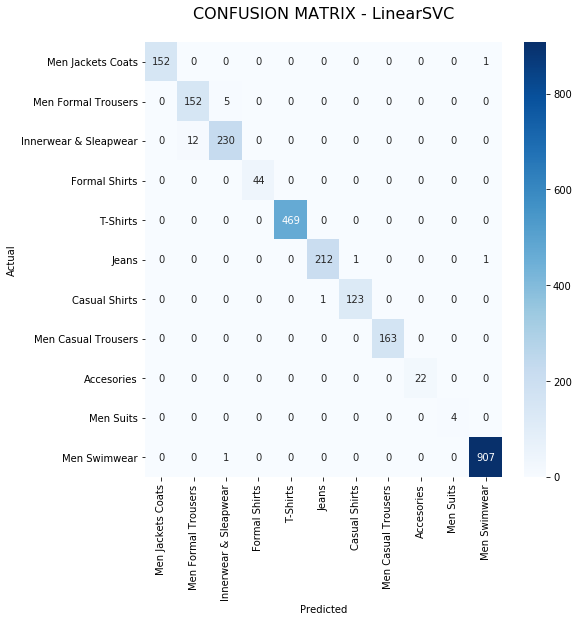

In [29]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=CATEGORY_ID_DF.CATEGORY.values, 
            yticklabels=CATEGORY_ID_DF.CATEGORY.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(features[0:1], features)

array([[1.        , 0.01430642, 0.00393803, ..., 0.        , 0.00344287,
        0.01673756]])

## Prediction

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [41]:
new_product_name = """Fort Collins Men Red Solid Padded Jacket"""

print(model.predict(fitted_vectorizer.transform([new_product_name])))

['Men Jackets Coats']


## Matching Product Name (Most Similar Product)

In [33]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(data1['NAME'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(10000, 1487)

In [34]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [35]:
def get_similarity_m(NAME,cosine_sim,data_clean,number_similar_products =10,show_simlar = 2):
    similar_products = cosine_sim.argsort()[:-number_similar_products:-1]
    similar_products = similar_products[1:,]
    print("Similar product to {0} : ".format(NAME))
    for x in similar_products:
        print(x+1)
    print('\n')
    print('Name of Most Similar Product:')
    print(data1["NAME"][similar_products[0]])
    print('\n')
    print(data1["NAME"][similar_products[1]])

In [36]:
get_similarity_m('maniac men grey solid vneck tshirt',cosine_sim,data1)

Similar product to maniac men grey solid vneck tshirt : 
[1188 3753 3692 ... 9999 8486 7210]
[   1 6590 6591 ... 3973 3970 9998]
[ 813  379 4218 ... 8274  875 9997]
[ 523 5087 5116 ... 8538  388 9996]
[7852 7898 5625 ... 8664 9159 9995]
[8517 8785 4802 ... 6194 9994 2981]
[ 534 8730 6273 ... 6810 5216 9993]
[4802 1191 4231 ... 7125 5303 9992]


Name of Most Similar Product:


C:\Users\ITD_Stu\Anaconda3\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


SERIAL NO
1187                                                  NaN
3752                                                  NaN
3691                                                  NaN
3682    us polo assn denim co men offwhit blue regular...
7892                                                  NaN
7897               levi men khaki regular fit solid chino
7898                                                  NaN
5494                                                  NaN
1167                                                  NaN
1168                                                  NaN
7934                                                  NaN
7941                                                  NaN
3629                                                  NaN
7954                                                  NaN
7978                                                  NaN
7982                                                  NaN
3608                                                  NaN
1181